誤差逆伝搬法を使った学習

In [23]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
import matplotlib.pyplot as plt

In [24]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

In [25]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [26]:
#更新回数
iters_num = 10000
train_size = x_train.shape[0]
#ミニバッチのサイズ
batch_size = 100
#学習率
learning_rate = 0.1

In [27]:
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

In [28]:
#ミニバッチを用いてすべてのデータにアクセスできるまで
iter_per_epoch = max(train_size / batch_size, 1)

In [29]:
for i in range(iters_num):
    #ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 誤差逆伝播法によって勾配を求める
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #全データを触るたびに精度の計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)
        
        #損失関数の推移を取得
        train_loss = network.loss(x_batch, t_batch)
        test_loss = network.loss(x_test, t_test)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)

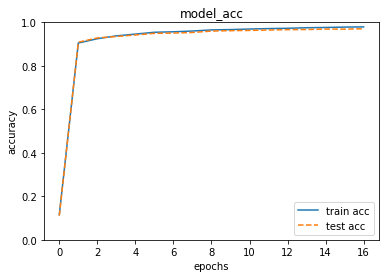

In [30]:
# 精度の推移　グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("model_acc")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

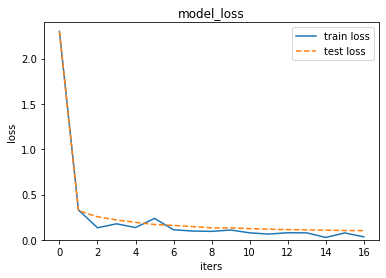

In [36]:
# 損失関数の推移　グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.plot(x, test_loss_list, label='test loss', linestyle='--')
plt.xlabel("iters")
plt.ylabel("loss")
plt.title("model_loss")
plt.ylim(0, 2.4)
plt.legend(loc='upper right')
plt.show()